In [41]:
import imageio
import numpy as np
import imgaug as ia
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import cv2 as cv
import matplotlib.pyplot as plt

# Load an example image (uint8, 128x128x3).
# image = ia.quokka(size=(128, 128), extract="square")
image = cv.imread('/data/file/rice_frame/images/1.jpg')

# Create an example mask (bool, 128x128).
# Here, we arbitrarily place a square on the image.
segmap = np.zeros((128, 128, 1), dtype=bool)
segmap[28:71, 35:85, 0] = True

segmap = SegmentationMapsOnImage(segmap, shape=image.shape)

# Draw three columns: (1) original image,
# (2) original image with mask on top, (3) only mask
cells = [
    image,
    segmap.draw_on_image(image, alpha=1.0, colors=(0, 0, 0))[0],
    segmap.draw(size=image.shape[:2])[0]
]

# Convert cells to a grid image and save.
grid_image = ia.draw_grid(cells, cols=4)
imageio.imwrite("example_segmaps_bool.jpg", grid_image)

# fig, ax = plt.subplots(1, 2, figsize=(8, 6))
# ax.imshow(grid_image)

In [12]:
grid_image.shape

(581, 2325, 3)

In [21]:
segmap = np.zeros((128, 128, 1), dtype=bool)
segmap.shape

(128, 128, 1)

In [24]:
segmap[28:71, 35:85, 0] = True
segmap.shape

(128, 128, 1)

In [25]:
segmap = SegmentationMapsOnImage(segmap, shape=image.shape)
segmap.shape

(581, 775, 3)

In [26]:
segmap

In [32]:
segmap.draw_on_image(image)[0].shape

(581, 775, 3)

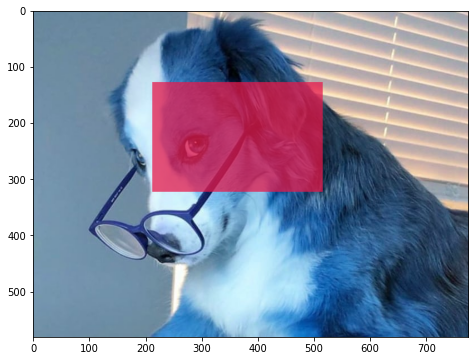

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(segmap.draw_on_image(image)[0])